Accuracy: 0.84

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.64      0.70        11
 Iris-virginica       0.71      0.83      0.77        12

       accuracy                           0.84        38
      macro avg       0.83      0.82      0.82        38
   weighted avg       0.85      0.84      0.84        38



c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


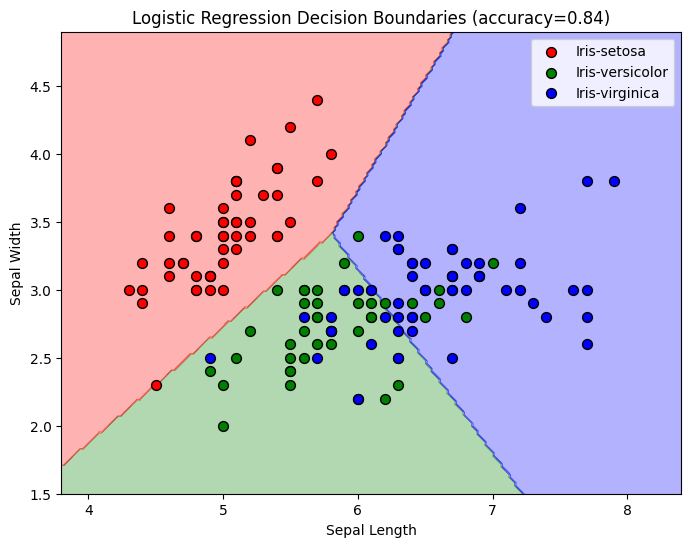

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the Iris dataset (3 classes: Setosa, Versicolor, Virginica)
data = pandas.read_csv('iris.txt', names=['sepal-length', 'sepal-width','petal-length', 'petal-width', 'class'])

# We'll use only the first two features 
X = data[['sepal-length', 'sepal-width']].round(2)
y = data['class']

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Train the model
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 6: Visualize decision boundaries
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
# Create a grid to evaluate model
x_min, x_max = X['sepal-length'].min() - 0.5, X['sepal-length'].max() + 0.5
y_min, y_max = X['sepal-width'].min() - 0.5, X['sepal-width'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the grid and convert to integer codes for contourf
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Create a consistent mapping from class name to integer (based on model.classes_)
class_names = model.classes_
class_to_int = {name: i for i, name in enumerate(class_names)}
Z_int = np.array([class_to_int[c] for c in Z])
Z_int = Z_int.reshape(xx.shape)

# Build a ListedColormap that matches the order of class_names
cmap = ListedColormap([colors[name] for name in class_names])

plt.figure(figsize=(8,6))

# Plot decision boundaries using the integer grid and colormap
plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=cmap)

# Plot original data points
for cls, color in colors.items():
    mask = (y == cls)
    plt.scatter(X.loc[mask, 'sepal-length'], X.loc[mask, 'sepal-width'],
                c=color, label=cls, edgecolors='k', s=50)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title(f'Logistic Regression Decision Boundaries (accuracy={accuracy:.2f})')
plt.show()
